In [42]:
import pandas as pd
import numpy as np
from openbb_terminal import OpenBBFigure

In [72]:
dataframe = pd.read_csv('option-board-SPY_CBOE_24X20238183113097745551650.csv')

dataframe['OI CALL'] = dataframe['Open Interest']
dataframe['OI PUT'] = dataframe['Open Interest.1']

dataframe["GEX PUT"] = 0
dataframe["GEX CALL"] = 0

In [73]:
dataframe['Open Interest.1']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
153    2174.0
154     587.0
155    1443.0
156    1879.0
157    2495.0
Name: Open Interest.1, Length: 158, dtype: float64

In [74]:
for index, row in dataframe.iterrows():
    dataframe.at[index, "GEX PUT"] = -(float(row['OI PUT']) * float(row['Gamma']) * (100))
    dataframe.at[index, "GEX CALL"] = float(row['OI CALL']) * float(row['Gamma']) * (100)

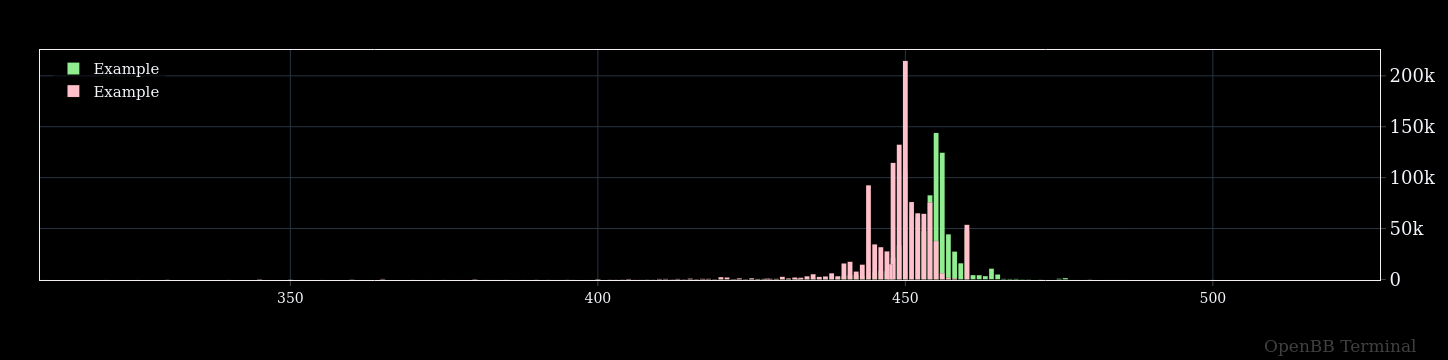

In [80]:
option_absolute_plot = OpenBBFigure()

option_absolute_plot.add_bar(
    x=dataframe['Strike'],
    y=dataframe['GEX CALL'],
    name='Example',
    marker_color="lightgreen",
    width=0.8
)

option_absolute_plot.add_bar(
    x=dataframe['Strike'],
    y=dataframe['GEX PUT'],
    name='Example',
    marker_color="pink",
    width=0.8
)
option_absolute_plot.update_layout()
option_absolute_plot.show(external=False)